pandas.date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html#pandas.date_range

用series創建df

https://blog.csdn.net/bqw18744018044/article/details/79934285

https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/

In [89]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
url = "http://web02.mof.gov.tw/njswww/WebProxy.aspx?sys=220&ym=9900&ymt=10800&kind=21&type=1&funid=i9111&cycle=4&outmode=0&compmode=00&outkind=1&fld1=1&codspc0=2,1,4,1,50,1,93,1,&codlst1=110&rdm=KxKyL5eB"
resp = requests.get(url)
resp.encoding = 'utf-8'

dfs = pd.read_html(resp.text)
df = dfs[1]
df.columns = df.columns.get_level_values(0)
df.columns = ['年','China_ex','China_im','Jp_ex','Jp_im','Eur_ex','Eur_im','US_ex','US_im']
df['nominal_GDP'] = [14060345,14262201,14677765,15270728,16258047,17055080,17555268,17983347,18342891,18925767]
#df.rename(columns={'Unnamed: 0_level_0':'Year'}, inplace = True)
df.set_index("年")

,China_ex,China_im,Jp_ex,Jp_im,Eur_ex,Eur_im,US_ex,US_im,nominal_GDP
年,,,,,,,,,
99年,2459720,1143576,582646,1671112,930429,849908,996657,829026,14060345
100年,2500315,1294611,561954,1561050,921702,904256,1070477,793731,14262201
101年,2444440,1226482,577810,1431450,854537,873444,980630,735634,14677765
102年,2494581,1285130,575049,1295528,827446,919478,967916,823672,15270728
103年,2562611,1490032,608815,1270018,879391,969427,1060100,887912,16258047
104年,2321423,1435293,619957,1231654,820222,902242,1091609,898797,17055080
105年,2373741,1417963,627965,1309027,842815,931597,1076497,873510,17555268
106年,2700760,1523328,626624,1277382,876478,953497,1119501,865570,17983347
107年,2909695,1621790,687337,1329933,942526,1042836,1191357,998973,18342891


In [72]:
df.columns

Index(['年', 'China_ex', 'China_im', 'Jp_ex', 'Jp_im', 'Eur_ex', 'Eur_im',
       'US_ex', 'US_im', 'nominal_GDP'],
      dtype='object')

In [138]:
China = (df['China_ex']+df['China_im'])/df['nominal_GDP']
Japan = (df['Jp_ex']+df['Jp_im'])/df['nominal_GDP']
Eur = (df['Eur_ex']+df['Eur_im'])/df['nominal_GDP']
US = (df['US_ex']+df['US_im'])/df['nominal_GDP']

In [139]:
frame = { 'China': China, 'Japan': Japan, 'Eur': EURO, 'US': US } 
df2 = pd.DataFrame(frame)
df2.set_index(pd.date_range('2010', periods=10,freq = '12M'),inplace = True)
df2

,China,Japan,Eur,US
2010-01-31,0.256274,0.160292,0.126621,0.129846
2011-01-31,0.266083,0.148855,0.128028,0.130710
2012-01-31,0.250101,0.136891,0.117728,0.116930
2013-01-31,0.247513,0.122494,0.114397,0.117322
2014-01-31,0.249270,0.115563,0.113717,0.119818
2015-01-31,0.220270,0.108567,0.100994,0.116705
2016-01-31,0.215987,0.110337,0.101076,0.111078
2017-01-31,0.234889,0.105876,0.101759,0.110384
2018-01-31,0.247043,0.109976,0.108236,0.119410
2019-01-31,0.243942,0.110009,0.108386,0.132515


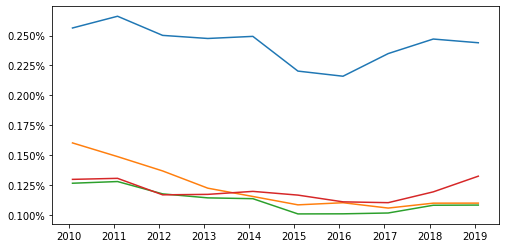

In [143]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig = plt.figure(1, (8, 4))
ax = fig.add_subplot(1,1,1)
ax.plot(df2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

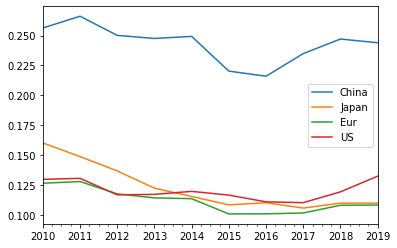

In [144]:
%matplotlib inline
import matplotlib.ticker as mtick
df2.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E6C29CBC8>,
      dtype=object)

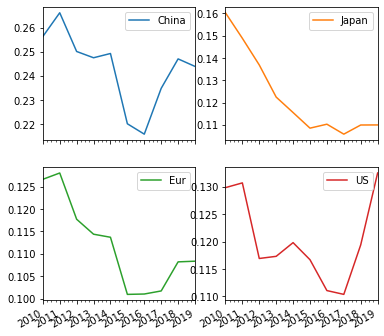

In [148]:
df2.plot(subplots=True, layout=(2, 2),figsize=(6, 6))

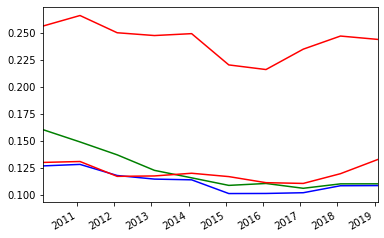

In [152]:
plt.figure()

with pd.plotting.plot_params.use('x_compat', True):
    df2.China.plot(color='r')
    df2.Japan.plot(color='g')
    df2.Eur.plot(color='b')
    df2.US.plot(color='r')
 

In [80]:
#df2.to_excel('FTD.xls', encoding='utf_8_sig')